In [7]:
!pip install jupyter_dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.1 MB/s eta 0:00:00


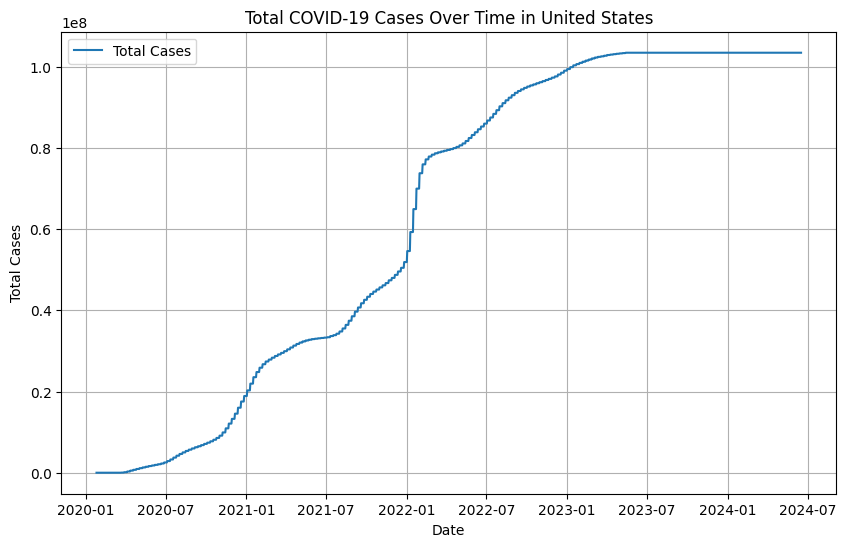

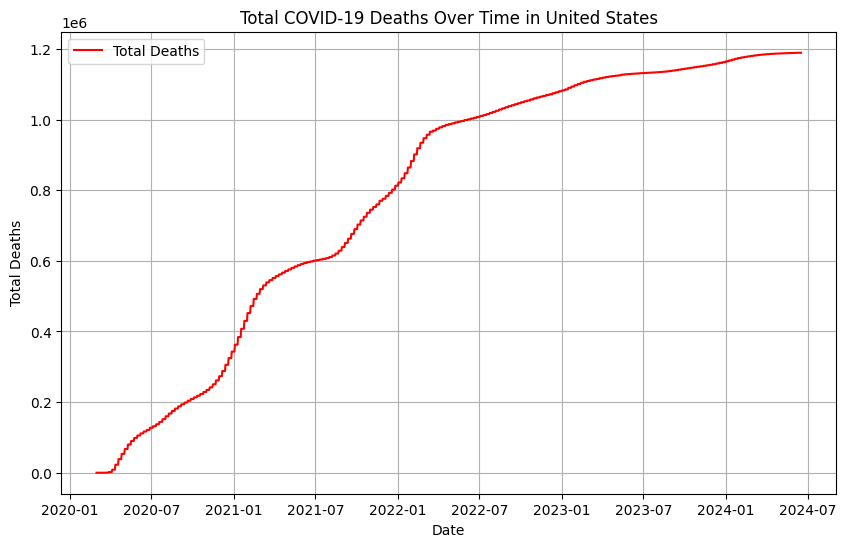

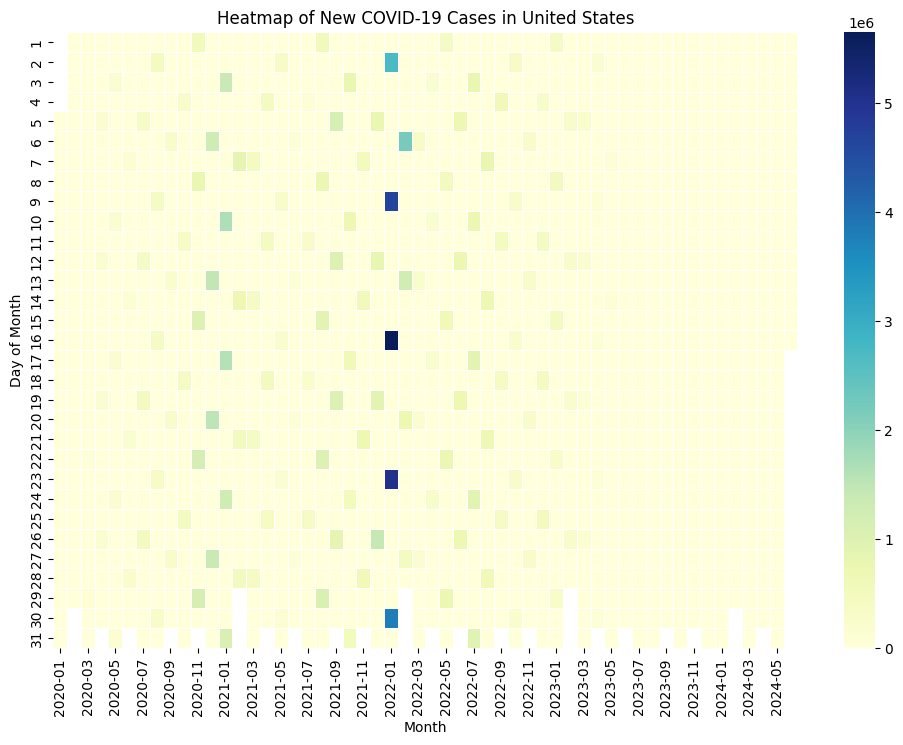

/usr/local/lib/python3.10/dist-packages/dash/dash.py:556: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# Install necessary libraries

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash.dependencies import Input, Output

# Load COVID-19 data
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
covid_df = pd.read_csv(url)

# Display the first few rows of the dataframe
covid_df.head()

# Data preprocessing
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df['month'] = covid_df['date'].dt.to_period('M')

# Filter data for a specific country (e.g., United States)
country = 'United States'
country_df = covid_df[covid_df['location'] == country]

# Exploratory Data Analysis (EDA)
# Plot total cases over time
plt.figure(figsize=(10, 6))
plt.plot(country_df['date'], country_df['total_cases'], label='Total Cases')
plt.title(f'Total COVID-19 Cases Over Time in {country}')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()

# Plot total deaths over time
plt.figure(figsize=(10, 6))
plt.plot(country_df['date'], country_df['total_deaths'], label='Total Deaths', color='red')
plt.title(f'Total COVID-19 Deaths Over Time in {country}')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.show()

# Create a heatmap of new cases by month
heatmap_data = country_df.pivot_table(values='new_cases', index=country_df['date'].dt.day, columns='month', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5)
plt.title(f'Heatmap of New COVID-19 Cases in {country}')
plt.xlabel('Month')
plt.ylabel('Day of Month')
plt.show()

# Interactive Dashboard using Dash
app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1(f'COVID-19 Data Dashboard for {country}'),
    dcc.Dropdown(
        id='metric-dropdown',
        options=[
            {'label': 'Total Cases', 'value': 'total_cases'},
            {'label': 'Total Deaths', 'value': 'total_deaths'},
            {'label': 'New Cases', 'value': 'new_cases'},
            {'label': 'New Deaths', 'value': 'new_deaths'}
        ],
        value='total_cases'
    ),
    dcc.Graph(id='time-series-chart'),
    dcc.Graph(id='heatmap-chart')
])

@app.callback(
    Output('time-series-chart', 'figure'),
    Input('metric-dropdown', 'value')
)
def update_time_series(selected_metric):
    fig = px.line(country_df, x='date', y=selected_metric, title=f'{selected_metric.replace("_", " ").title()} Over Time')
    return fig

@app.callback(
    Output('heatmap-chart', 'figure'),
    Input('metric-dropdown', 'value')
)
def update_heatmap(selected_metric):
    heatmap_data = country_df.pivot_table(values=selected_metric, index=country_df['date'].dt.day, columns='month', aggfunc='sum')
    fig = px.imshow(heatmap_data, title=f'Heatmap of {selected_metric.replace("_", " ").title()}')
    return fig

app.run_server(mode='inline')